In [37]:
import os
import numpy as np
import networkx as nx
from copy import deepcopy
import json

In [44]:
class Graph():
    def __init__(self, root='kitchen'):
        self.root = root
        self.parents = {}
    
    def add(self, node, parent):
        assert parent in self.parents.keys() or parent == self.root
        self.parents[node] = parent

    def draw(self):
        G = nx.DiGraph()
        G.add_nodes_from(list(self.parents.keys()))
        G.add_edges_from([(n, self.parents[n]) for n in self.parents])
        still_remaining = deepcopy(list(self.parents.keys()))
        nodelists = [[self.root]]
        while(len(still_remaining)):
            new_layer = []
            remaining_nodes = still_remaining
            still_remaining = []
            for n in remaining_nodes:
                if self.parents[n] in nodelists[-1]:
                    # print(n)
                    new_layer.append(n)
                else:
                    still_remaining.append(n)
            nodelists.append(new_layer)
            # print(new_layer)
        nx.draw_networkx(G)
    
    def move(self, object, location):
        assert location in self.parents.keys() or location == self.root
        self.parents[object] = location
    
    def to_dict(self):
        id_map = {self.root:0}
        id_map .update({n:i+1 for i,n in enumerate(self.parents.keys())})
        graph_dict = {}
        graph_dict['nodes'] = [{'id':i, 'class_name':n} for n,i in id_map.items()]
        graph_dict['edges'] = [{'from_id':id_map[n], 'to_id':id_map[p], 'relation_type':'INSIDE'} for n,p in self.parents.items()]
        return graph_dict

    def dump(self, filename):
        graph_dict = self.to_dict()
        with open (filename, 'w') as f:
            json.dump(graph_dict, f, indent=4)


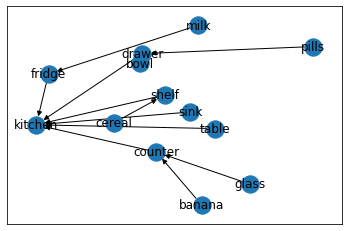

In [45]:
initial_graph = Graph('kitchen')
initial_graph.add(node='shelf', parent='kitchen')
initial_graph.add(node='drawer', parent='kitchen')
initial_graph.add(node='sink', parent='kitchen')
initial_graph.add(node='counter', parent='kitchen')
initial_graph.add(node='fridge', parent='kitchen')
initial_graph.add(node='table', parent='kitchen')

initial_graph.add(node='cereal', parent='shelf')
initial_graph.add(node='bowl', parent='drawer')
initial_graph.add(node='pills', parent='drawer')
initial_graph.add(node='banana', parent='counter')
initial_graph.add(node='glass', parent='counter')
initial_graph.add(node='milk', parent='fridge')
# print(initial_graph.parents)
initial_graph.draw()

In [46]:
initial_graph.dump('demo_graph.json')

In [47]:
import random
def d(dmin, dmax):
    return (random.random()*(dmax-dmin))+dmin

In [51]:
def execute_routine(graph, initial_time, steps):
    time = initial_time
    graph_list = []
    time_list = []
    for ((obj, loc), (dmin, dmax)) in steps:
        duration = d(dmin, dmax)
        graph.move(obj, loc)
        graph_list.append(deepcopy(graph.to_dict()))
        time_list.append(deepcopy(time))
        time += duration
    obj_in_use = [[] for _ in range(len(graph_list))]
    return {"graphs":graph_list, "times": time_list, "objects_in_use":obj_in_use}


breakfast_routine_major_steps = [
        (('cereal', 'table'), (60,120)),
        (('milk', 'table'), (3,5)),
        (('bowl', 'table'), (3,5)),
        (('glass', 'table'), (3,5)),
        (('milk', 'fridge'), (10,15)),
        (('bowl', 'sink'), (10,15)),
        (('glass', 'sink'), (3,5)),
        (('cereal', 'shelf'), (3,5))
    ]

breakfast_routine_minor_steps = [
        (('banana', 'table'), (60,120)),
        (('glass', 'table'), (3,5)),
        (('glass', 'sink'), (10,15))
    ]

medication_steps = [
        (('pills', 'table'), (60,120)),
        (('glass', 'table'), (3,5)),
        (('glass', 'sink'), (10,15)),
        (('pills', 'drawer'), (3,5))
]

In [54]:
major_breakfast_prob = 0.8

directory = 'demo_routines/routines_train'
os.makedirs(directory)
for i in range(30):
    if random.random() < 0.8:
        routine = execute_routine(initial_graph, 0, breakfast_routine_major_steps+medication_steps)
    else:
        routine = execute_routine(initial_graph, 0, breakfast_routine_minor_steps+medication_steps)
    
    with open(os.path.join(directory,"{:3d}.json".format(i)), 'w') as f:
        json.dump(routine, f)

directory = 'demo_routines/routines_test'
os.makedirs(directory)
for i in range(10):
    if random.random() < 0.8:
        routine = execute_routine(initial_graph, 0, breakfast_routine_major_steps+medication_steps)
    else:
        routine = execute_routine(initial_graph, 0, breakfast_routine_minor_steps+medication_steps)
    
    with open(os.path.join(directory,"{:3d}.json".format(i)), 'w') as f:
        json.dump(routine, f)

